# What's this all about?

This came from an idea that I had when I was watching a lecture from Ian Goodfellow on adversarial attacks. An adversarial attack looks like this:

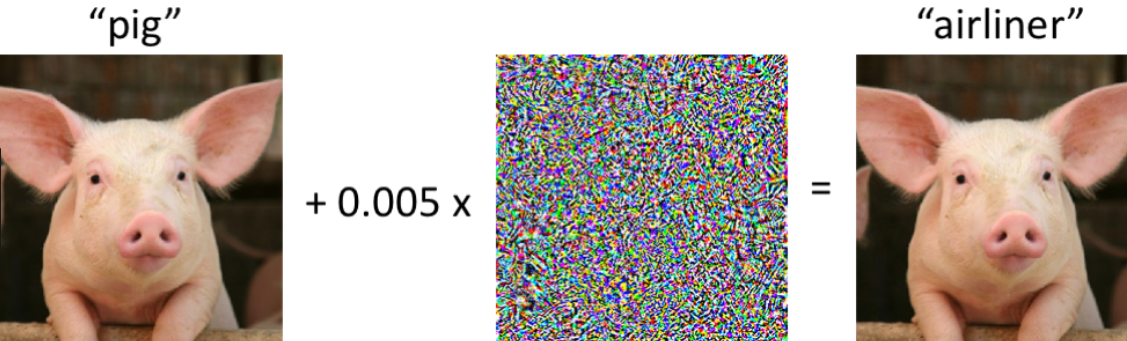

In [ ]:
from IPython.display import Image
Image("img/adversarial_attack.png")

With some carefully crafted noise, neural networks can be systematically fooled into making wildly incorrect predictions. This on its own is intriguing, but it was something else that inspired this project.

When talking about the use of adversarial attacks in practice, Goodfellow mentioned that there were a few ways of pulling it off. If you have full access to the model, you just backpropagate all the way back to the input of the network. If you can only run queries on the model, you can use synthetic gradients (though it takes longer) to generate attacks. Ok, sure - makes sense. But what if you don't have the ability to run multiple queries? What if you only have one chance at fooling a network you've never seen before?

Oddly enough, you can still generate an adversarial attack for a brand new network. The answer is surprisingly simple - you just use an adversarial example from another network. In the image above, you would probably be able to use this attack on many other networks that have been trained on the same dataset.

This fact made me believe that neural networks trained on the same dataset are learning the same function. It's a very complicated function that is parameterized by the dataset. But since it's just one function, that would explain why many different networks can be fooled by the same examples. Under this view, since a dataset completely defines a function that is learned by the network during training, there is an equivalence between a dataset and the final network state after training. Training is molding a network to take on the function defined by the dataset, and the reverse is adversarial training: creating a dataset from a function defined by the network.

This relationship between datasets and trained networks can be used to do some interesting things. The principal question: if networks are learning the same function after all, can you train networks to correctly classify images by training them to make the same mistakes as another trained network?

'Testing'